# Regression Analysis

## Does crative features influence on Click Through Rate?

-- Cuáles son los drivers de performance en Paid Social (TikTok)?

In [30]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
import statsmodels.api as sm

In [33]:
df = pd.read_csv('../../data/datasets/tiktok_topads_clean_transformed.csv')
display(df.head())
display(df.tail())

,cost,ctr,like,is_ugc,duration,height,width,high_interaction,industry_parent_Apparel & Accessories,industry_parent_Appliances,...,demographic_representation_Unclear,audience_focus_Others,audience_focus_Problem Aware,audience_focus_Solution Aware,audience_focus_Unclear,campaign_objective_App Promotion,campaign_objective_Awareness,campaign_objective_Others,campaign_objective_Sales,aspect_ratio
0,2,0.01,14299,False,37.334,1024.0,576.0,True,False,False,...,False,True,False,False,False,False,True,False,False,0.5625
1,0,0.02,2427,False,17.323,1024.0,576.0,False,False,False,...,False,True,False,False,False,False,True,False,False,0.5625
2,0,0.02,2739,True,14.016,1024.0,576.0,False,False,False,...,False,True,False,False,False,True,False,False,False,0.5625
3,1,0.02,5491,True,19.318,1280.0,720.0,True,False,False,...,False,True,False,False,False,True,False,False,False,0.5625
4,1,0.03,1811,True,25.250,1280.0,720.0,False,False,False,...,False,True,False,False,False,True,False,False,False,0.5625


,cost,ctr,like,is_ugc,duration,height,width,high_interaction,industry_parent_Apparel & Accessories,industry_parent_Appliances,...,demographic_representation_Unclear,audience_focus_Others,audience_focus_Problem Aware,audience_focus_Solution Aware,audience_focus_Unclear,campaign_objective_App Promotion,campaign_objective_Awareness,campaign_objective_Others,campaign_objective_Sales,aspect_ratio
409,2,0.03,1966,True,58.770,1024.0,576.0,False,False,False,...,False,True,False,False,False,False,False,False,True,0.5625
410,2,0.02,11650,False,71.400,1024.0,576.0,True,False,False,...,True,True,False,False,False,False,True,False,False,0.5625
411,1,0.02,1842,True,109.085,1280.0,720.0,False,True,False,...,False,False,True,False,False,False,False,False,True,0.5625
412,2,0.02,3435,True,129.677,1280.0,720.0,False,True,False,...,False,True,False,False,False,False,False,False,True,0.5625
413,2,0.03,22938,True,21.884,1024.0,576.0,True,True,False,...,False,True,False,False,False,False,False,False,True,0.5625


## Parametric: linear regression with OLS

### Target = CTR

In [37]:
#I need to cast boolean features to int
df = df * 1

In [38]:
#lets see if there are any non numeric features
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='bool').columns)

Index([], dtype='object')
Index([], dtype='object')


In [ ]:
df['']

In [39]:
# Prepare X (features) and y (target)
y = df['ctr']
X = df.drop(['ctr', 'cost', 'like', 'high_interaction'], axis=1)

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     4.774
Date:                Tue, 27 May 2025   Prob (F-statistic):           1.95e-28
Time:                        10:22:17   Log-Likelihood:                 1814.7
No. Observations:                 414   AIC:                            -3357.
Df Residuals:                     278   BIC:                            -2810.
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [46]:
# Get coefficients and feature names
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.params
})

# Sort by absolute coefficient value
coef_df['abs_coef'] = abs(coef_df['coefficient'])
coef_df = coef_df.sort_values('abs_coef', ascending=False)

# Display top coefficients
print("\nTop 10 most influential features:")
print(coef_df.head(10))



Top 10 most influential features:
                                                                                   feature  \
industry_child_Gifts & Flowers                              industry_child_Gifts & Flowers   
industry_child_Kitchen & Bathroom Appliances  industry_child_Kitchen & Bathroom Appliances   
industry_child_Constructional Engineering        industry_child_Constructional Engineering   
aspect_ratio                                                                  aspect_ratio   
industry_child_Pet Toys                                            industry_child_Pet Toys   
industry_child_Financial Services                        industry_child_Financial Services   
industry_child_News & Reading                                industry_child_News & Reading   
industry_child_Gaming Devices                                industry_child_Gaming Devices   
industry_child_Health & Fitness                            industry_child_Health & Fitness   
industry_child_Dating & M

### Target = Likes

In [41]:
# Prepare X (features) and y (target)
y = df['like']
X = df.drop(['ctr', 'cost', 'like', 'high_interaction'], axis=1)

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1.301
Date:                Tue, 27 May 2025   Prob (F-statistic):             0.0349
Time:                        10:44:30   Log-Likelihood:                -4109.6
No. Observations:                 414   AIC:                             8491.
Df Residuals:                     278   BIC:                             9039.
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## Non-Parametric: tree based regression

In [43]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
# Prepare X (features) and y (target) 
y = df['ctr']
X = df.drop(['ctr', 'cost', 'like', 'high_interaction'], axis=1)

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

# Sort features by importance and display top 10
print("Top 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

# Predict on training data
y_pred = rf_model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")



Top 10 Most Important Features:
                                   feature  importance
23                  industry_parent_Travel    0.126772
20                    industry_parent_Pets    0.102513
1                                 duration    0.078838
136          objective_value_Product sales    0.058789
106  industry_child_Pet Household Products    0.046454
12      industry_parent_Financial Services    0.046347
125     industry_child_Tours & Attractions    0.041763
135            objective_value_Conversions    0.039852
14                   industry_parent_Games    0.036865
21        industry_parent_Sports & Outdoor    0.025670
Mean Squared Error: 0.0000
R-squared: 0.9387


## Mix Analysis 

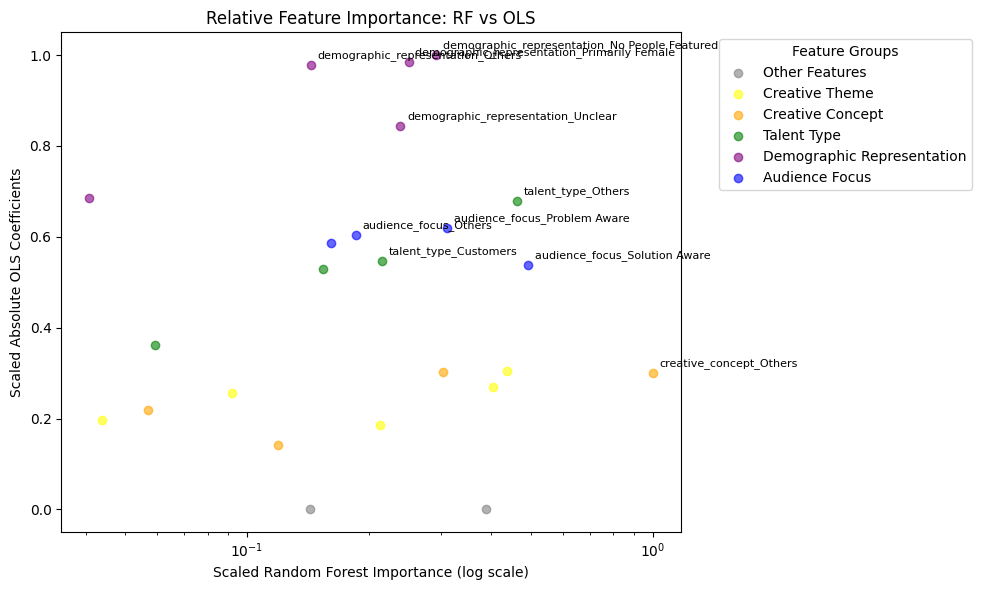

In [63]:
# Get OLS coefficients from previous linear regression
# First need to standardize the data to get comparable coefficients
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OLS model
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_scaled, y)

# Create dataframe with both importance scores
comparison_df = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf_model.feature_importances_,
    'ols_coef': np.abs(ols_model.coef_)  # Take absolute value for comparison
})

# remove features that start with 'industry since they are not relevant for the analysis
comparison_df = comparison_df[
    ~comparison_df['feature'].str.startswith('objective_value_') &
    ~comparison_df['feature'].str.startswith('industry_') &
    ~comparison_df['feature'].str.startswith('campaign_') &
    ~comparison_df['feature'].str.startswith('duration') &
    ~comparison_df['feature'].str.startswith('height') &
    ~comparison_df['feature'].str.startswith('width') 
]

# Putting both on the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
comparison_df[['rf_importance_scaled', 'ols_coef_scaled']] = scaler.fit_transform(
    comparison_df[['rf_importance', 'ols_coef']]
)

# Add color coding based on feature groups
def get_feature_group_and_color(feature_name):
    if feature_name.startswith('talent_type_'):
        return 'Talent Type', 'green'
    elif feature_name.startswith('audience_focus_'):
        return 'Audience Focus', 'blue'
    elif feature_name.startswith('creative_concept_'):
        return 'Creative Concept', 'orange'
    elif feature_name.startswith('creative_theme_'):
        return 'Creative Theme', 'yellow'
    elif feature_name.startswith('demographic_representation_'):
        return 'Demographic Representation', 'purple'
    else:
        return 'Other Features', 'gray'

comparison_df['group'], comparison_df['color'] = zip(*comparison_df['feature'].apply(get_feature_group_and_color))

# Calculate average importance and difference for top 10 selection
comparison_df['avg_importance'] = (comparison_df['rf_importance_scaled'] + comparison_df['ols_coef_scaled']) / 2
comparison_df['importance_diff'] = abs(comparison_df['rf_importance_scaled'] - comparison_df['ols_coef_scaled'])
top_10_features = comparison_df.nlargest(10, 'avg_importance')['feature'].tolist()

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot points by feature group
for group in comparison_df['group'].unique():
    mask = comparison_df['group'] == group
    color = comparison_df[mask]['color'].iloc[0]
    plt.scatter(comparison_df[mask]['rf_importance_scaled'], 
               comparison_df[mask]['ols_coef_scaled'],
               c=color, alpha=0.6, label=group)

# Add labels only for top 10 features
for idx, row in comparison_df.iterrows():
    if row['feature'] in top_10_features:
        plt.annotate(row['feature'], 
                    (row['rf_importance_scaled'], row['ols_coef_scaled']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)

plt.xlabel('Scaled Random Forest Importance (log scale)')
plt.ylabel('Scaled Absolute OLS Coefficients')
plt.title('Relative Feature Importance: RF vs OLS')
plt.xscale('log')
plt.legend(title='Feature Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
